###Importing all necessary libraries

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# I. Erdos-Renyi Model

In [13]:
def distribution_graph(g):
    print(nx.degree(g))
    degree_all = list(dict((nx.degree(g))).values())
  
    degree_uni = list(set(degree_all))

    degree_uni.sort()
    degree_nodes = []
    
    for i in degree_uni:
        degree_nodes.append(degree_all.count(i))
  
    plt.plot(degree_uni, degree_nodes)
    plt.xlabel("Degrees")
    plt.ylabel("No. of nodes")
    plt.title("Degree distribution")
    plt.show()

###Total number of nodes (N) in graph


In [14]:
print("Enter number of nodes")
N = int(input())

Enter number of nodes
25


###Probability P for edges

In [15]:
print("Enter value of probability of every node")
P = float(input())

Enter value of probability of every node
0.5


In [16]:
g = nx.Graph() #Creating an empty graph object


In [17]:
g.add_nodes_from(range(1, N + 1)) # Adding nodes 

###Adding edges to the graph randomly

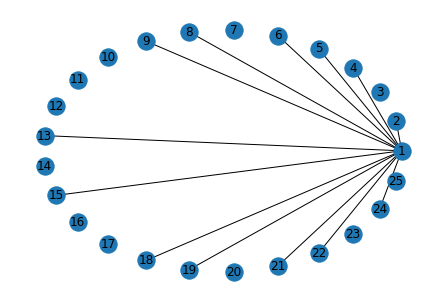

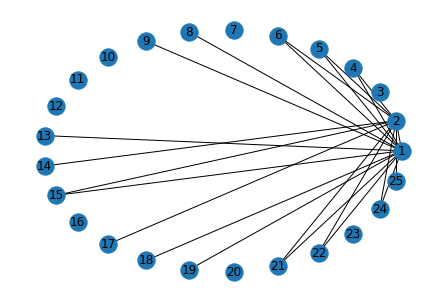

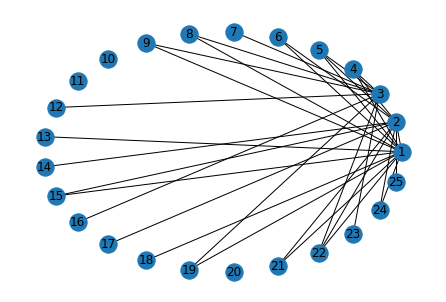

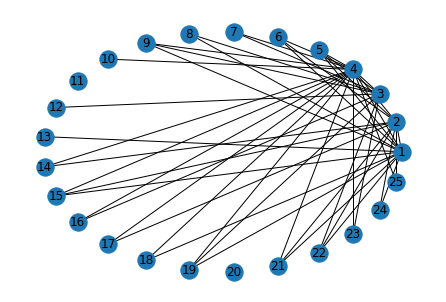

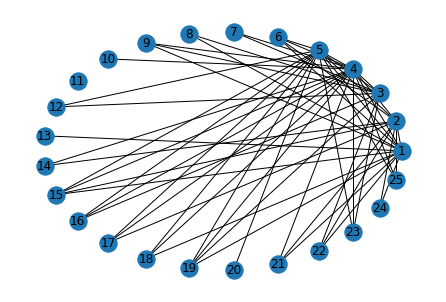

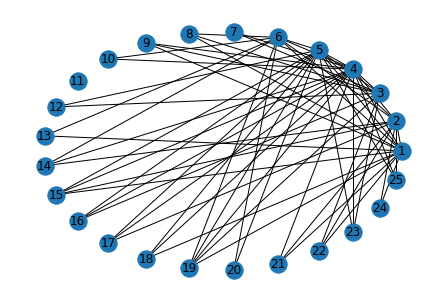

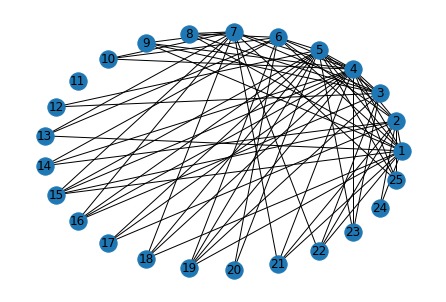

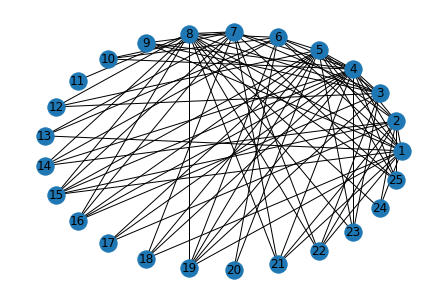

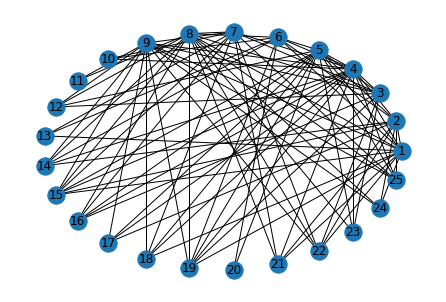

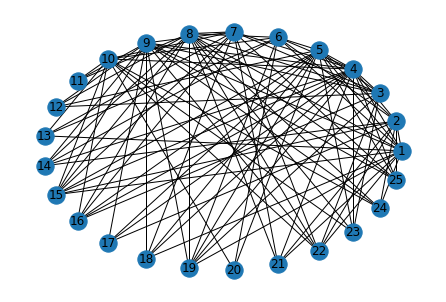

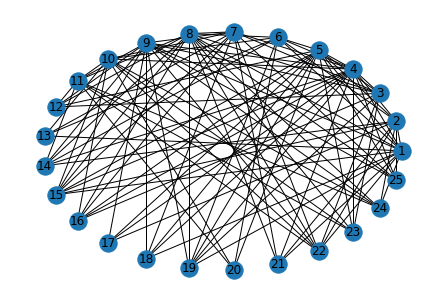

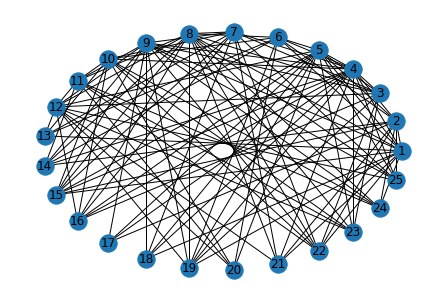

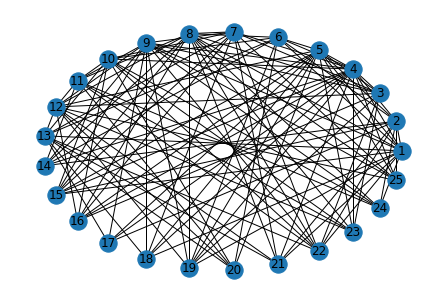

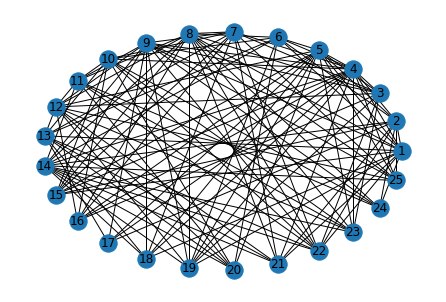

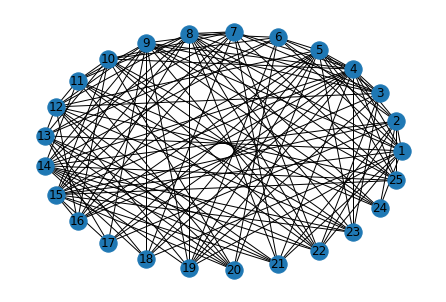

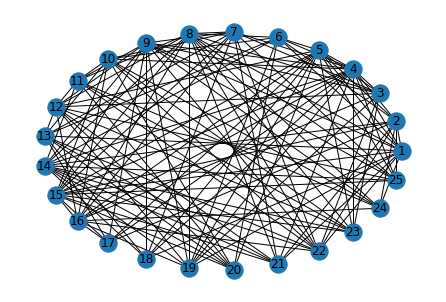

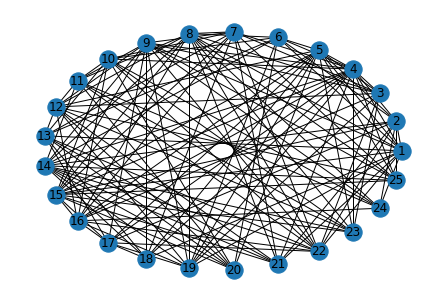

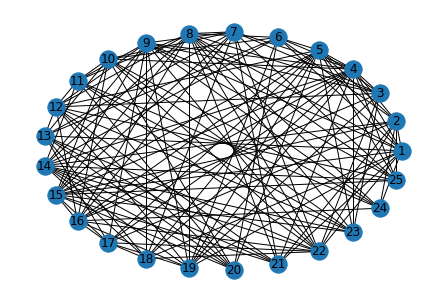

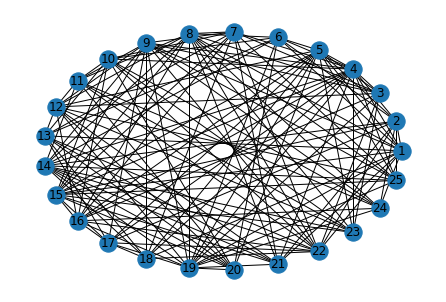

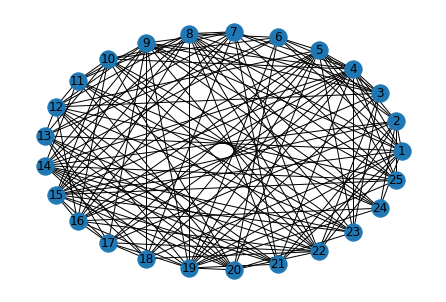

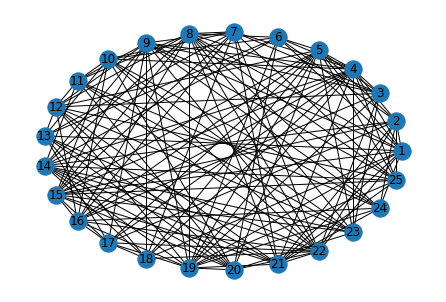

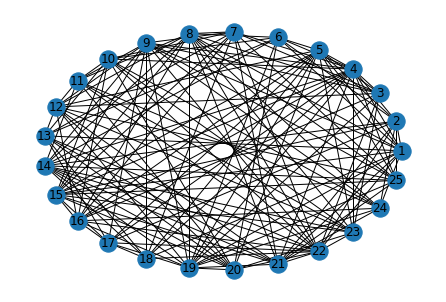

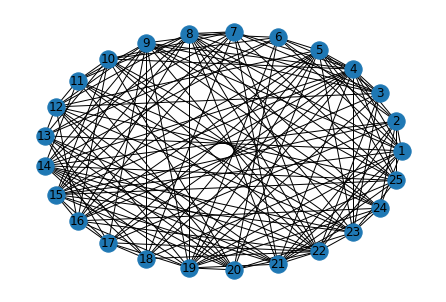

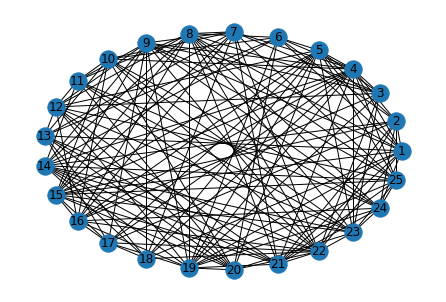

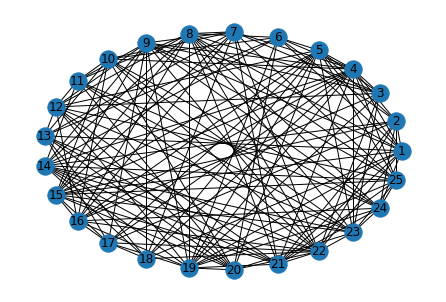

In [18]:
for i in g.nodes():
    for j in g.nodes():
        if (i < j):
            R = random.random()
            if (R < P):
                g.add_edge(i, j)
    pos = nx.circular_layout(g)

    #Display the social network
    nx.draw(g, pos, with_labels=1)
    plt.show()
    


###Displaying connection between nodes

[(1, 13), (2, 11), (3, 10), (4, 17), (5, 14), (6, 10), (7, 12), (8, 15), (9, 14), (10, 11), (11, 9), (12, 12), (13, 10), (14, 13), (15, 14), (16, 12), (17, 10), (18, 9), (19, 15), (20, 11), (21, 13), (22, 16), (23, 13), (24, 11), (25, 13)]


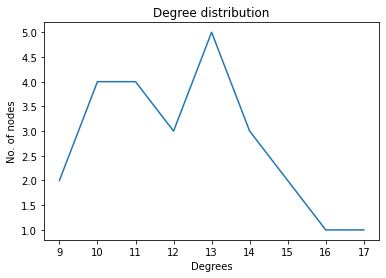

In [19]:
distribution_graph(g)

# II. Watts Strogatz Algortithm Implementation

In [20]:
def Watts_Strogatz(n,k,p):
    #Phase 1
    G = nx.Graph()

    for i in range(0,n):
        G.add_node(i)
    
    nodes_all = set(G)

    for i in range(0,n):
        for j in range(1,int(k/2)+1): #Connecting each node to k/2 neighbors on each side. Using cycling (mod n).
            G.add_edge(i,(i+j)%n)
            G.add_edge(i,(i-j)%n)

    #Phase 2
    for e in G.edges():
        if (np.random.binomial(1,p) == 1): #Binomial with n=1 is bernoulli.
            u = e[0]
            neighbors = set(G.neighbors(u))
            neighbors.add(u)
            v = np.random.choice(list(nodes_all - neighbors)) #On probability p, remove edge and add a random one between node and non-neighbors
            G.remove_edge(e[0],e[1])
            G.add_edge(u,v)

    return G

[(0, 13), (1, 13), (2, 9), (3, 9), (4, 9), (5, 12), (6, 14), (7, 12), (8, 12), (9, 10), (10, 7), (11, 8), (12, 11), (13, 9), (14, 9), (15, 8), (16, 7), (17, 13), (18, 12), (19, 11), (20, 10), (21, 9), (22, 12), (23, 9), (24, 13), (25, 9), (26, 11), (27, 14), (28, 9), (29, 12), (30, 9), (31, 13), (32, 9), (33, 8), (34, 7), (35, 8), (36, 10), (37, 12), (38, 10), (39, 9), (40, 10), (41, 10), (42, 8), (43, 8), (44, 13), (45, 7), (46, 9), (47, 10), (48, 11), (49, 10), (50, 9), (51, 10), (52, 9), (53, 14), (54, 11), (55, 8), (56, 12), (57, 11), (58, 9), (59, 10), (60, 13), (61, 8), (62, 9), (63, 11), (64, 9), (65, 9), (66, 8), (67, 10), (68, 12), (69, 10), (70, 11), (71, 9), (72, 10), (73, 9), (74, 11), (75, 11), (76, 9), (77, 11), (78, 11), (79, 10), (80, 11), (81, 9), (82, 13), (83, 9), (84, 10), (85, 9), (86, 9), (87, 10), (88, 13), (89, 12), (90, 10), (91, 11), (92, 9), (93, 12), (94, 11), (95, 10), (96, 9), (97, 13), (98, 13), (99, 10), (100, 8), (101, 9), (102, 11), (103, 10), (104, 8)

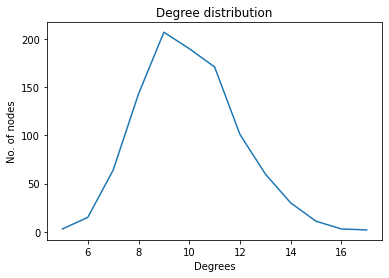

In [21]:
G = Watts_Strogatz(1000,10,0.5)
distribution_graph(G)